In [1]:
from selenium import webdriver
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"Automobile_insurance_fraud.csv")
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


The dataset has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

# Exploratory Data Analysis (EDA)

In [3]:
df.shape

(1000, 40)

In [4]:
print("Number of rows=",df.shape[0])
print("Number of columns=",df.shape[1])

Number of rows= 1000
Number of columns= 40


In [5]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

It denotes name of all 23 columns

In [6]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

The given columns has three data types (float64, int64, object)

In [7]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

## Data PreProcessing

In [9]:
df.isna().sum()  

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [10]:
# some missing values are denoted by '0', so let's replace missing values with np.nan  
  
df.replace('0', np.nan, inplace = True)  
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


there is no missing value in our data except _c39 column

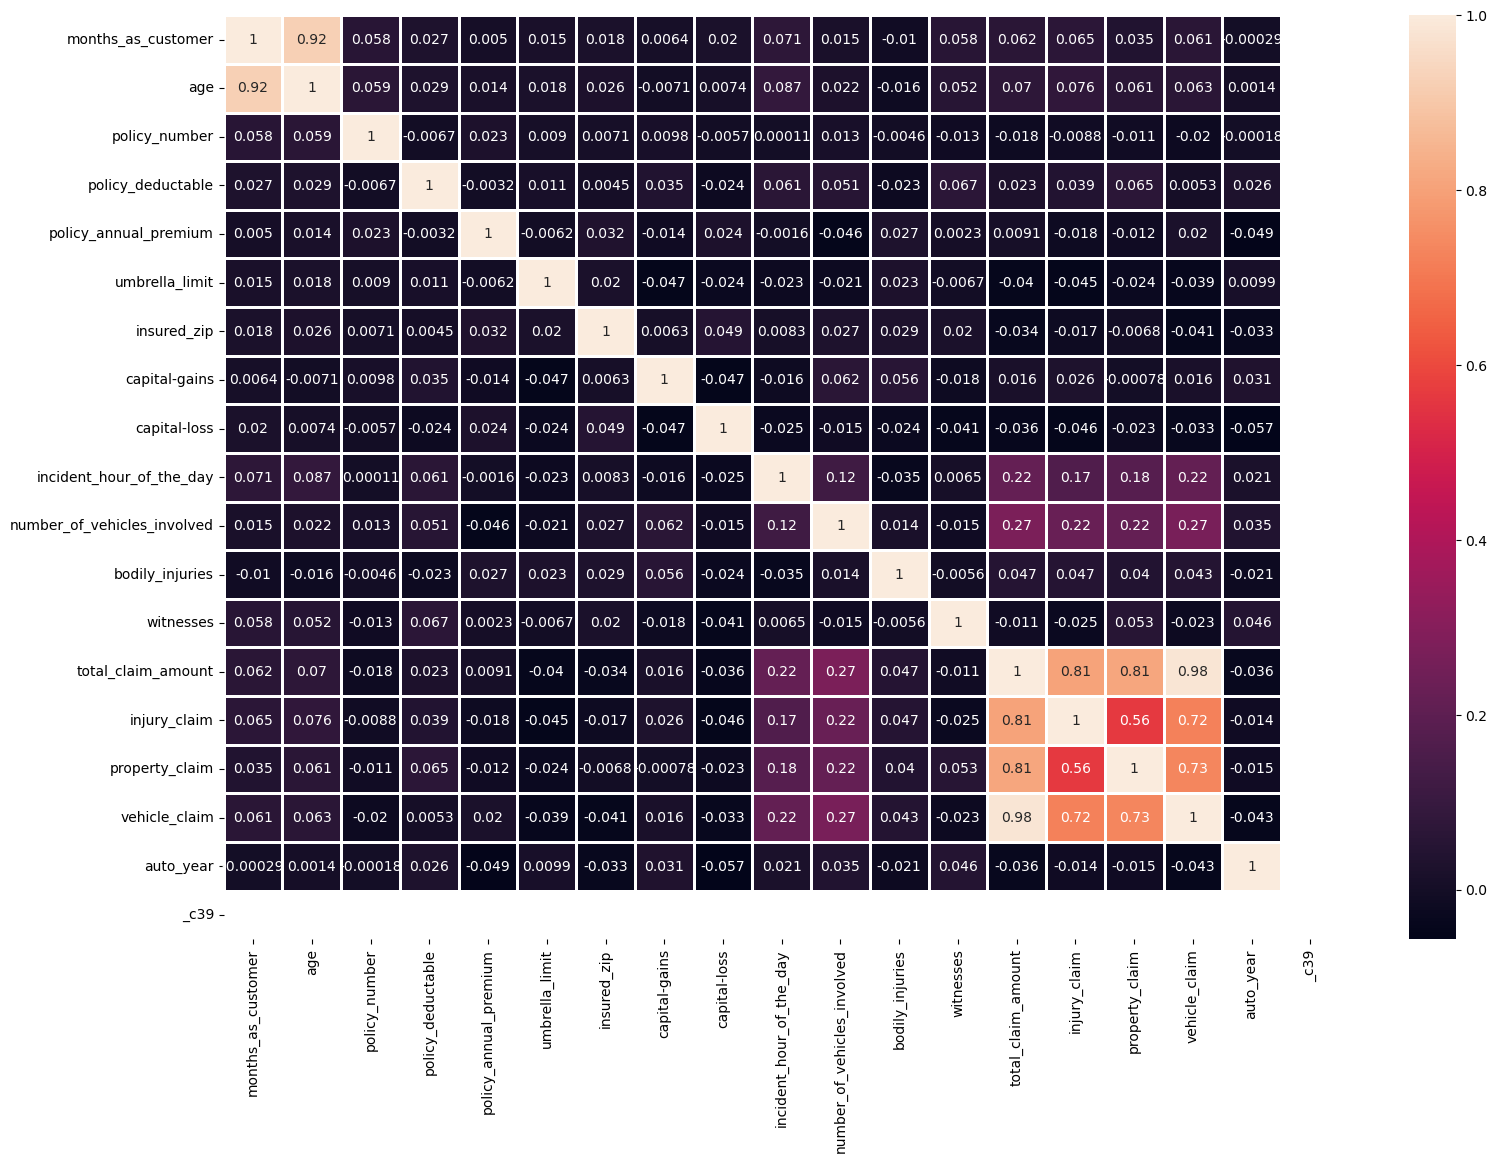

In [11]:
# Heatmap
plt.figure(figsize = (18, 12))  
  
corr = df.corr()  
  
sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)  
plt.show() 

In [12]:
# Finding no. of unique values
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [13]:
    # dropping columns that are not necessary for prediction  
to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',  
               'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year', '_c39']        
df.drop(to_drop, inplace = True, axis = 1)  
df.head()  

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,?,0,0,?,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,?,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


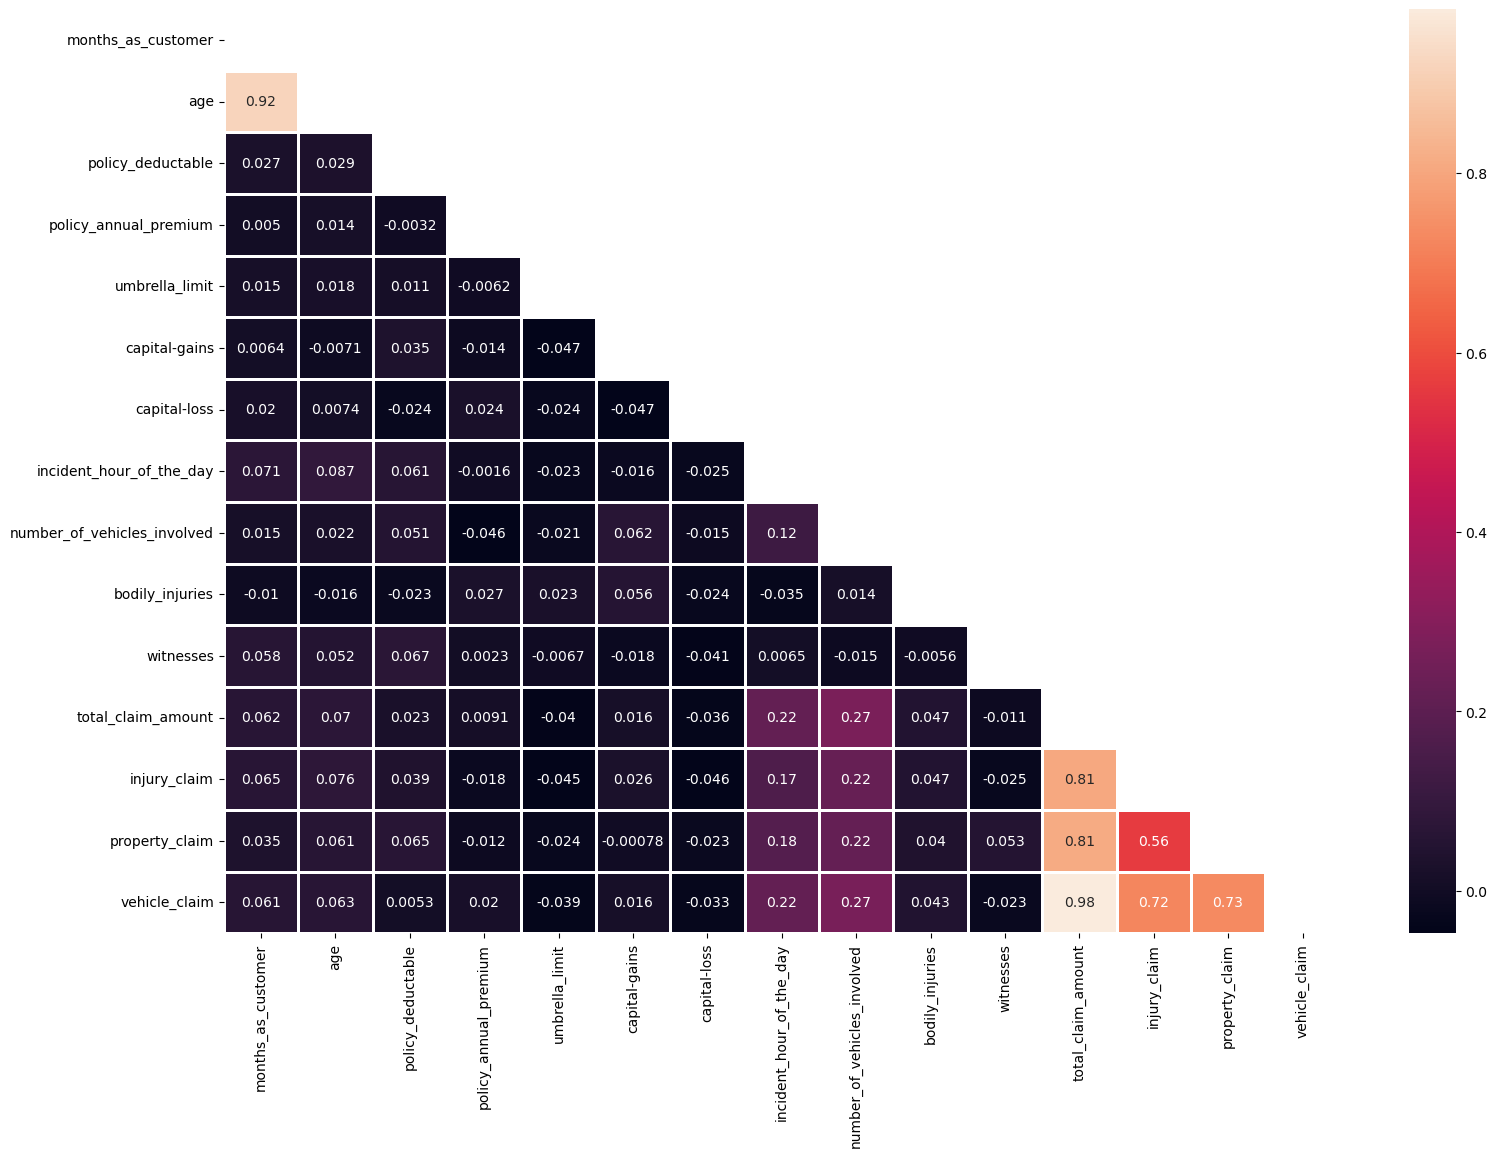

In [14]:
# checking for multicollinearity        
plt.figure(figsize = (18, 12))        
corr = df.corr()  
mask = np.triu(np.ones_like(corr, dtype = bool))        
sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)  
plt.show()  

From the above plot, we can see that there is a high correlation between age and months_as_customer. We will drop the "Age" column. Also, there is a high correlation between total_clam_amount, injury_claim, property_claim, and vehicle_claim, as the total claim is the sum of all others. So we will drop the total claim column.

In [15]:
df.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)  
df.head()  

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,8,1,?,0,0,?,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,5,1,?,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,20,1,NO,0,1,NO,1300,650,4550,N


## Data analysis on columns having categorical value

In [16]:
df.isnull().sum()

months_as_customer             0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
fraud_reported                 0
dtype: int64

In [17]:
# extracting categorical columns  
df_cat = df.select_dtypes(include = ['object'])
df_cat

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES,Y
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,?,Minor Damage,Police,?,?,Y
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO,N
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,?,NO,Y
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,?,Minor Damage,None,NO,NO,N
...,...,...,...,...,...,...,...,...,...,...,...,...
995,500/1000,FEMALE,Masters,craft-repair,unmarried,Single Vehicle Collision,Front Collision,Minor Damage,Fire,YES,?,N
996,100/300,FEMALE,PhD,prof-specialty,wife,Single Vehicle Collision,Rear Collision,Major Damage,Fire,YES,?,N
997,250/500,FEMALE,Masters,armed-forces,other-relative,Multi-vehicle Collision,Side Collision,Minor Damage,Police,?,YES,N
998,500/1000,MALE,Associate,handlers-cleaners,wife,Single Vehicle Collision,Rear Collision,Major Damage,Other,?,YES,N


In [18]:
# printing unique values of each column  
for col in df_cat.columns:  
    print(f"{col}: \n{df_cat[col].unique()}\n") 

policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' '?' 'Rear Collision' 'Front Collision']

incident_severity: 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted: 
['Police' 'None' 'Fire' 'Other' 'Ambulance']

property_damage: 
['YES' '?' 'NO']

police_report_available: 
['YES' '?' 'NO']

fraud_reported: 
['Y' 'N']



In [19]:
df.replace({'property_damage':{'?':'0'}},inplace=True)
df.replace({'police_report_available':{'?':'0'}},inplace=True)
df.replace({'collision_type':{'?':'0'}},inplace=True)


In [20]:
df['collision_type'].unique()

array(['Side Collision', '0', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [22]:
# Converting into numerical values

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['policy_csl'] = encoder.fit_transform(df['policy_csl'])
df['insured_sex'] = encoder.fit_transform(df['insured_sex'])
df['insured_education_level'] = encoder.fit_transform(df['insured_education_level'])
df['insured_occupation'] = encoder.fit_transform(df['insured_occupation'])
df['incident_type'] = encoder.fit_transform(df['incident_type'])
df['collision_type'] = encoder.fit_transform(df['collision_type'])
df['incident_severity'] = encoder.fit_transform(df['incident_severity'])
df['authorities_contacted'] = encoder.fit_transform(df['authorities_contacted'])
df['property_damage'] = encoder.fit_transform(df['property_damage'])
df['police_report_available'] = encoder.fit_transform(df['police_report_available'])
df['fraud_reported'] = encoder.fit_transform(df['fraud_reported'])
df['insured_relationship'] = encoder.fit_transform(df['insured_relationship'])





In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   policy_csl                   1000 non-null   int32  
 2   policy_deductable            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   insured_sex                  1000 non-null   int32  
 6   insured_education_level      1000 non-null   int32  
 7   insured_occupation           1000 non-null   int32  
 8   insured_relationship         1000 non-null   int32  
 9   capital-gains                1000 non-null   int64  
 10  capital-loss                 1000 non-null   int64  
 11  incident_type                1000 non-null   int32  
 12  collision_type               1000 non-null   int32  
 13  incident_severity  

## Seperating target and independent variables

In [35]:
X = df.drop('fraud_reported', axis = 1)  
y = df['fraud_reported']  
Y.shape

(1000,)

In [36]:
X.shape


(1000, 24)

## Data Visualisation

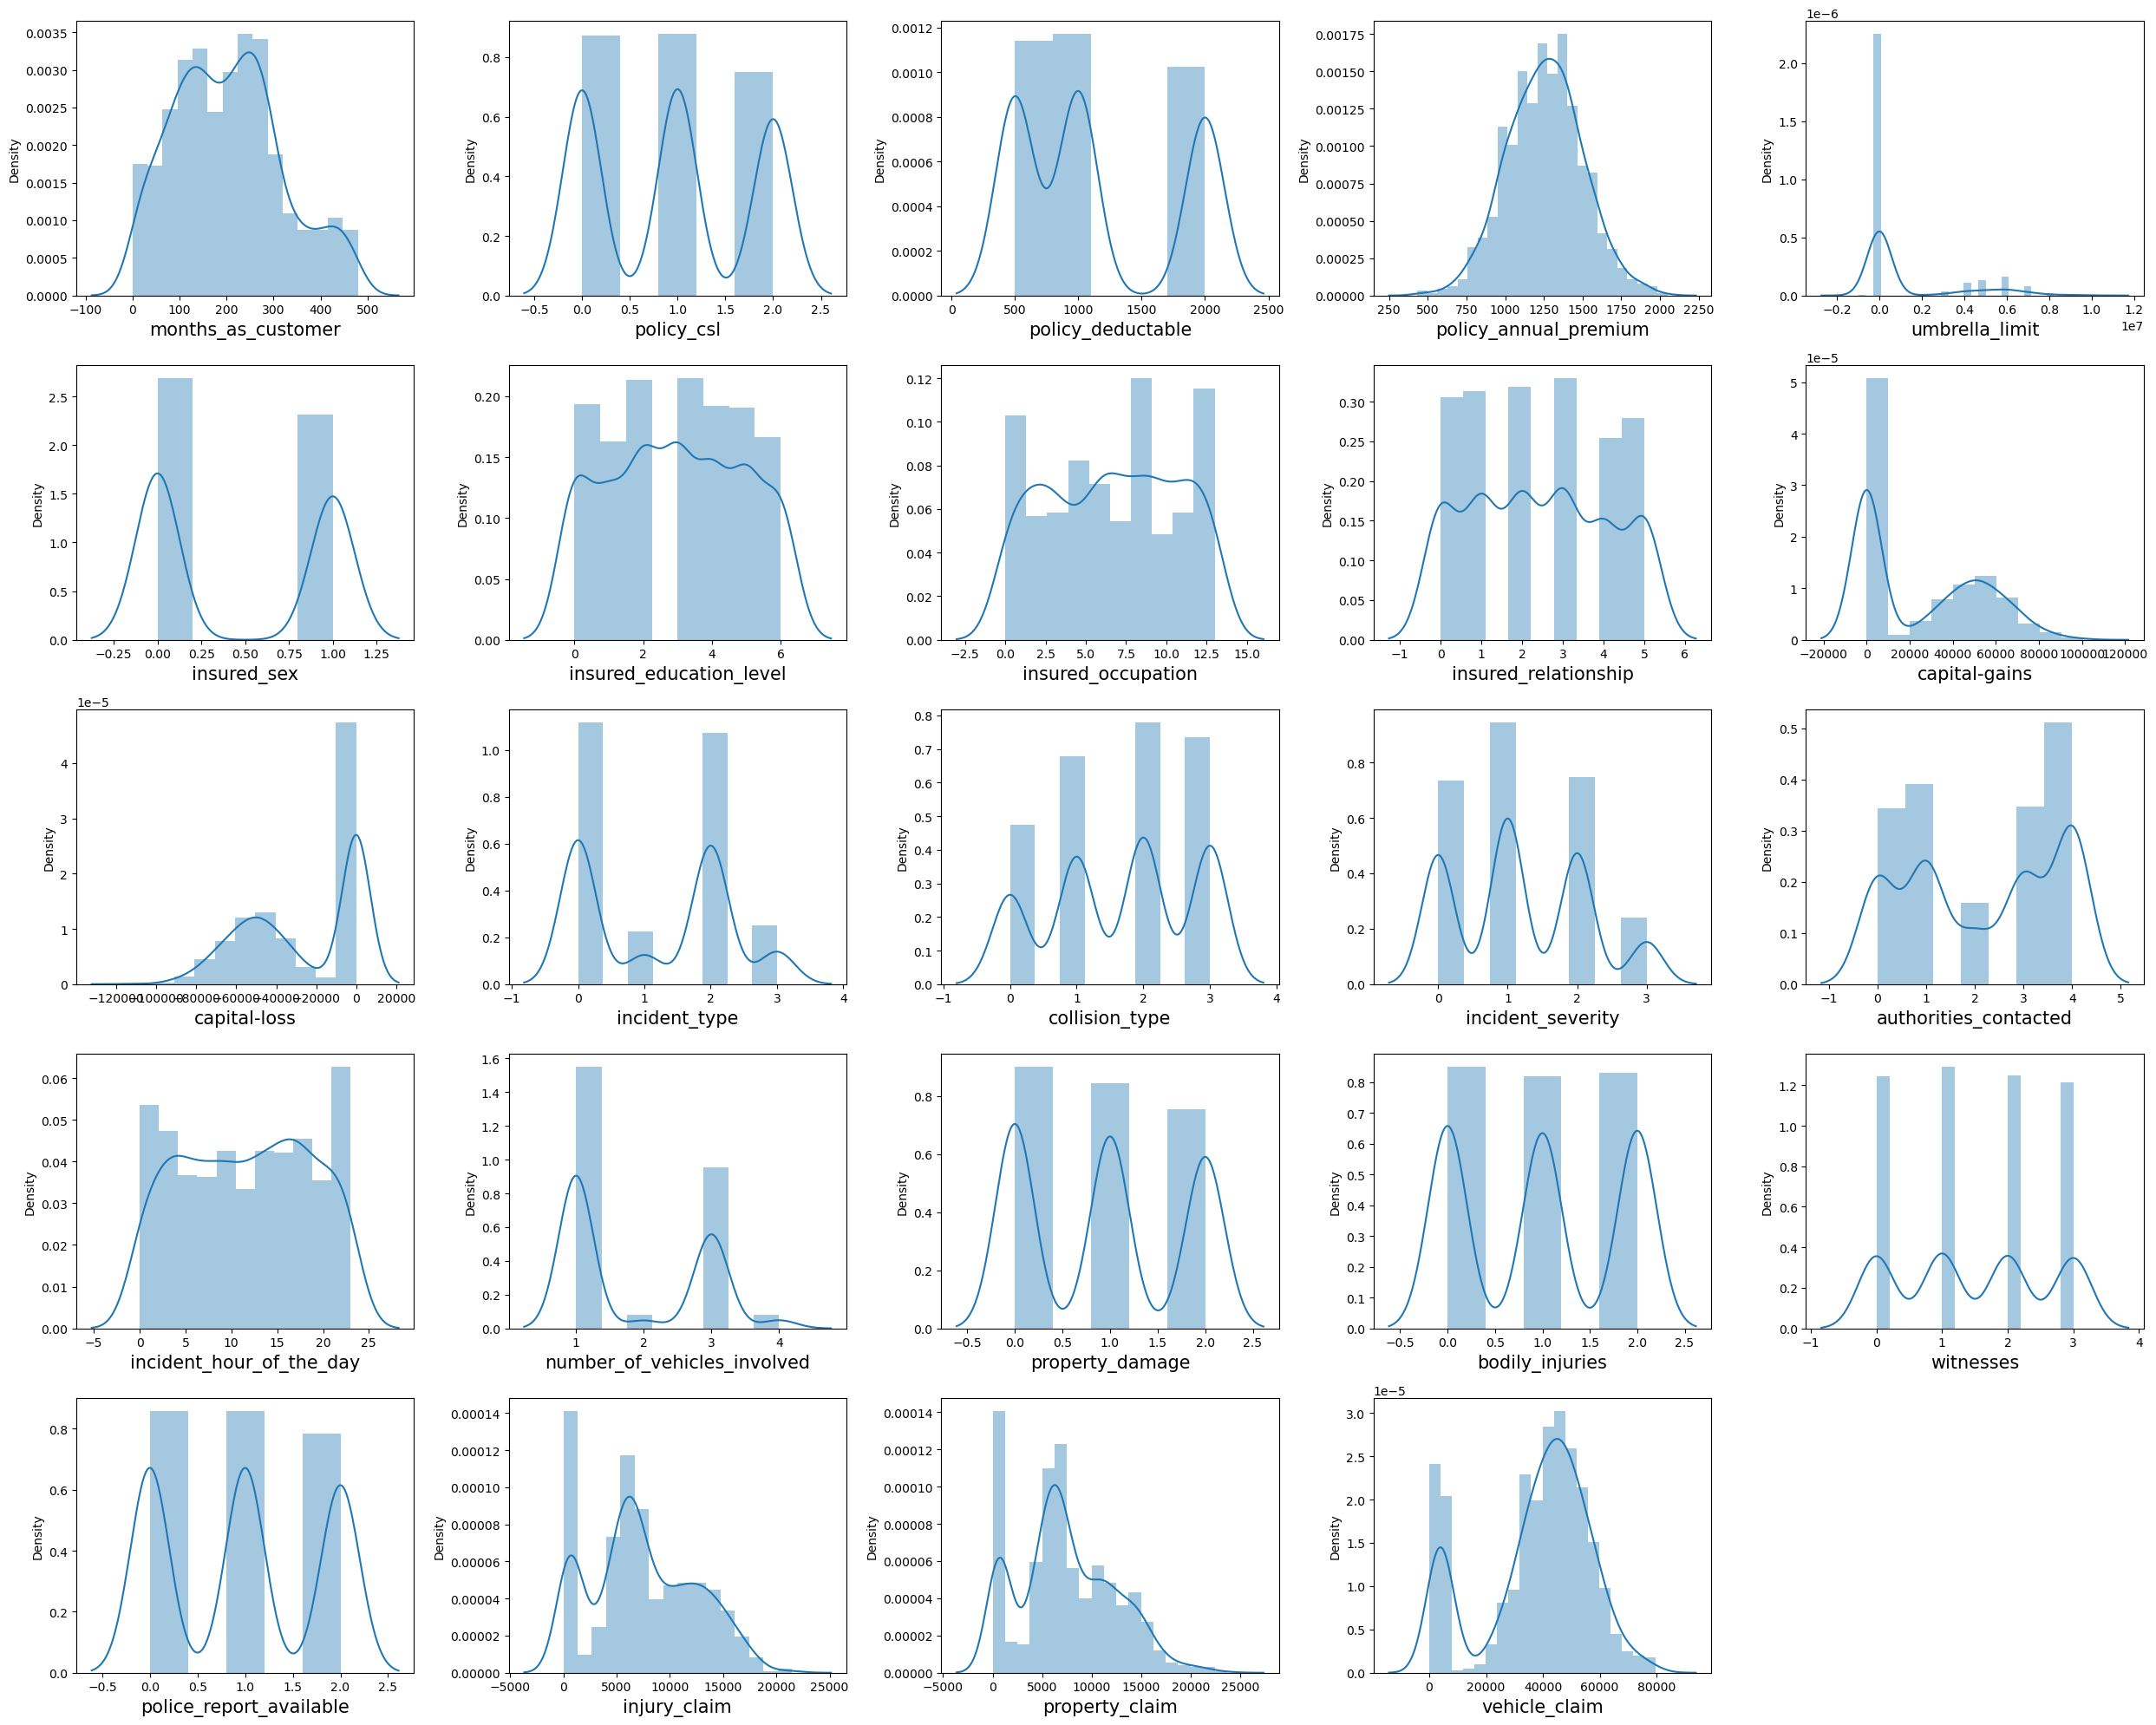

In [37]:
plt.figure(figsize = (25, 20))  
plotnumber = 1  
for col in X.columns:  
    if plotnumber <= 24:  
        ax = plt.subplot(5, 5, plotnumber)  
        sns.distplot(X[col])  
        plt.xlabel(col, fontsize = 15)  
             
    plotnumber += 1  
         
plt.tight_layout()  
plt.show()  

# Machine Learning Algorithm

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

In [39]:
from sklearn.model_selection import train_test_split  
  
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)  
X_train.head()  

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim
483,222,0,1000,1226.78,0,1,3,1,4,49600,...,3,17,2,2,2,0,0,16300,8150,57050
647,235,2,500,1398.94,0,1,1,2,0,0,...,0,11,1,1,1,2,1,6830,13660,47810
994,141,2,1000,1347.04,0,1,2,11,3,0,...,2,6,1,0,1,2,2,540,1080,4860
359,292,2,500,1097.57,0,1,6,8,4,0,...,3,12,1,1,1,0,2,6170,6170,49360
220,246,1,2000,1649.18,0,1,1,4,2,0,...,3,18,1,2,1,2,2,11160,5580,44640


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,200):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.39, random_state=i)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best accuracy is', maxR2_score ,'on Random_state', maxRS)

Best accuracy is 0.18971630437520848 on Random_state 162


# Linear Regression Matrix

In [41]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred))

 Error :
Mean absolute error : 0.3258941461438484
Mean squared error : 0.15433062472683454
Root Mean Squared Error: 0.3928493664584869


 R2 Score :
0.15635106307678515


# Applying Other Regression Model

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

In [43]:
rf = RandomForestRegressor(n_estimators = 100 )
svr=SVR()
dtc = DecisionTreeRegressor()
ad=AdaBoostRegressor()

model = [rf,svr,dtc,ad]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
                                            
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))

    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('\n')



 Error of  RandomForestRegressor() :
Mean absolute error : 0.2974102564102564
Mean squared error : 0.1645520512820513
Root Mean Squared Error: 0.40565015873539517


 R2 Score :
0.10047559660724548


 Error of  SVR() :
Mean absolute error : 0.2939444263364128
Mean squared error : 0.20311882338888712
Root Mean Squared Error: 0.4506870570461139


 R2 Score :
-0.11034980726889487


 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.24615384615384617
Mean squared error : 0.24615384615384617
Root Mean Squared Error: 0.4961389383568338


 R2 Score :
-0.3456009200690051


 Error of  AdaBoostRegressor() :
Mean absolute error : 0.32577398717728573
Mean squared error : 0.15554553375571206
Root Mean Squared Error: 0.39439261371850265


 R2 Score :
0.14970975832936295




From the above, we can see that LinearRegression has maximum R2 score

### Predicting income

In [44]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.39, random_state=32)
rfr=RandomForestRegressor()
rfr.fit(X_train,Y_train)
rfr.score(X_train,Y_train)
y_pred=rfr.predict(X_test)
print('Predicted result income:\n', y_pred)
print('\n')
print('actual income\n',Y_test)

Predicted result income:
 [0.07 0.38 0.08 0.16 0.59 0.6  0.02 0.04 0.59 0.53 0.53 0.02 0.05 0.04
 0.61 0.64 0.1  0.7  0.27 0.06 0.07 0.19 0.01 0.76 0.44 0.04 0.06 0.21
 0.64 0.02 0.66 0.09 0.23 0.07 0.14 0.52 0.03 0.75 0.01 0.77 0.73 0.45
 0.04 0.02 0.71 0.76 0.06 0.   0.03 0.07 0.27 0.51 0.04 0.06 0.06 0.
 0.16 0.46 0.17 0.06 0.03 0.86 0.05 0.53 0.63 0.24 0.15 0.07 0.02 0.15
 0.02 0.15 0.02 0.11 0.51 0.05 0.11 0.44 0.64 0.58 0.58 0.14 0.57 0.05
 0.2  0.27 0.21 0.57 0.25 0.72 0.2  0.63 0.02 0.03 0.63 0.56 0.02 0.05
 0.02 0.27 0.74 0.02 0.02 0.01 0.62 0.14 0.01 0.11 0.1  0.7  0.05 0.13
 0.62 0.27 0.04 0.07 0.1  0.06 0.52 0.   0.   0.17 0.54 0.1  0.1  0.07
 0.05 0.01 0.29 0.28 0.07 0.06 0.63 0.09 0.13 0.53 0.03 0.06 0.18 0.68
 0.17 0.35 0.09 0.07 0.16 0.03 0.1  0.83 0.01 0.02 0.67 0.63 0.46 0.04
 0.27 0.74 0.   0.54 0.02 0.09 0.07 0.05 0.16 0.2  0.1  0.01 0.58 0.04
 0.01 0.6  0.03 0.02 0.77 0.22 0.08 0.03 0.59 0.62 0.01 0.2  0.69 0.04
 0.02 0.07 0.24 0.64 0.44 0.52 0.04 0.62 0.06 0.02 0.